## Analyze Real Estate Prices with Linear Regression and Hypothesis Testing Using Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("transactions.csv")
df

,age,MRT_dist,stores,latitude,longitude,price,year
0,30.4,1735.5950,2.0,24.96464,121.51623,25.9,2012
1,32.7,392.4459,6.0,24.96398,121.54250,30.5,2012
2,15.5,815.9314,4.0,24.97886,121.53464,37.4,2012
3,34.5,623.4731,7.0,24.97933,121.53642,40.3,2012
4,23.0,130.9945,6.0,24.95663,121.53765,37.2,2012
...,...,...,...,...,...,...,...
413,18.1,1783.1800,3.0,24.96731,121.51486,20.9,2013
414,13.3,561.9845,5.0,24.98746,121.54391,47.3,2013
415,2.6,533.4762,4.0,24.97445,121.54765,55.0,2013
416,16.9,4066.5870,0.0,24.94297,121.50342,18.3,2013


### Attribute Information

__Dependent Variable (to be explained by independent variables):__

price: house price of unit area (10,000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

__Independent Variables:__

- year: the transaction year 
- age: the house age (unit: years)
- MRT_dist: the distance to the nearest MRT station (unit: meter)
- stores: the number of convenience stores in the living circle on foot (integer)
- latitude: the geographic coordinate, latitude. (unit: degree)
- longitude: the geographic coordinate, longitude. (unit: degree)

### Data Preprocessing

In [3]:
df.head()

,age,MRT_dist,stores,latitude,longitude,price,year
0,30.4,1735.5950,2.0,24.96464,121.51623,25.9,2012
1,32.7,392.4459,6.0,24.96398,121.54250,30.5,2012
2,15.5,815.9314,4.0,24.97886,121.53464,37.4,2012
3,34.5,623.4731,7.0,24.97933,121.53642,40.3,2012
4,23.0,130.9945,6.0,24.95663,121.53765,37.2,2012


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        418 non-null    float64
 1   MRT_dist   417 non-null    float64
 2   stores     417 non-null    float64
 3   latitude   418 non-null    float64
 4   longitude  418 non-null    float64
 5   price      418 non-null    float64
 6   year       418 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 23.0 KB


one missing value in two columns MRT_dist and stores.

In [5]:
#check null values

df.isna().sum()

age          0
MRT_dist     1
stores       1
latitude     0
longitude    0
price        0
year         0
dtype: int64

In [6]:
#removing rows with null values

df.dropna(inplace=True)

In [7]:
df.isna().sum()

age          0
MRT_dist     0
stores       0
latitude     0
longitude    0
price        0
year         0
dtype: int64

In [8]:
#check duplicates

df.duplicated().sum()

2

In [9]:
#remove duplicates

df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 417
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        414 non-null    float64
 1   MRT_dist   414 non-null    float64
 2   stores     414 non-null    float64
 3   latitude   414 non-null    float64
 4   longitude  414 non-null    float64
 5   price      414 non-null    float64
 6   year       414 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


### Exploratory Data Analysis

In [11]:
df.describe()

,age,MRT_dist,stores,latitude,longitude,price,year
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193,2012.695652
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488,0.460687
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000,2012.000000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000,2012.000000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000,2013.000000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000,2013.000000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000,2013.000000


no extreme values.

In [12]:
#correlation matrix

correlation = df.corr()

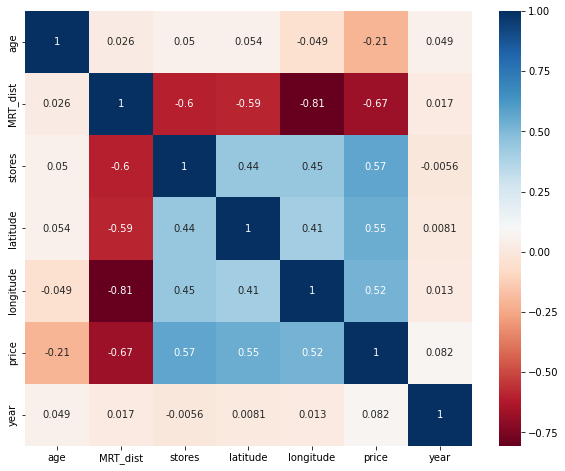

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,cmap='RdBu')
plt.show()

Negative relationship between price and MRT_dist.

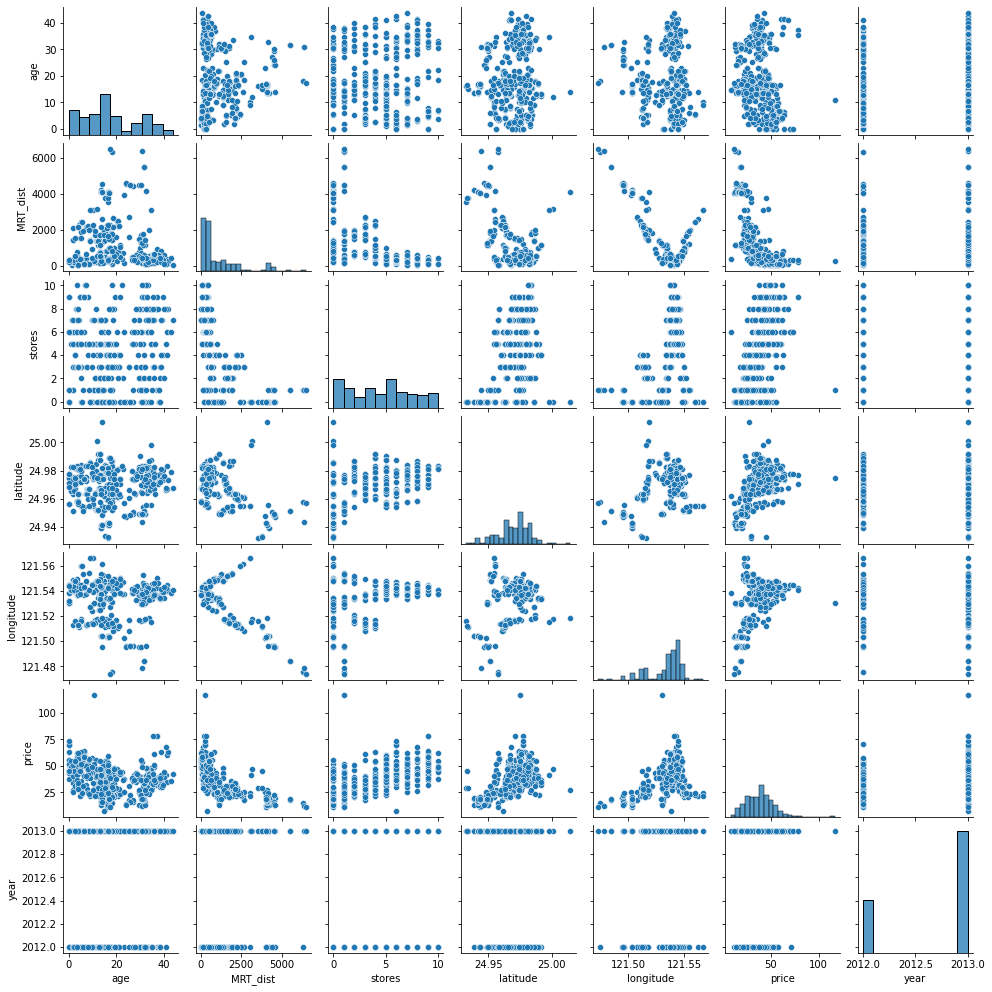

In [14]:
sns.pairplot(df,height=2)
plt.show()

There's a non-linear relationship between price and MRT_dist.

here, price ~ 1/MRT_dist

In [15]:
df['inverted_price'] = 1/df['price']*100

#inverted price --> area per unit price

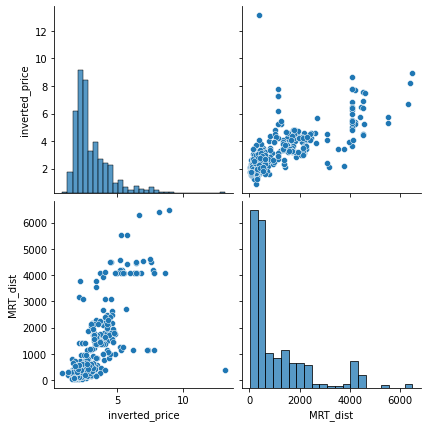

In [16]:
sns.pairplot(df[["inverted_price", "MRT_dist"]], height = 3)
plt.show()

In [17]:
corr_matrix = df.corr()
#abs(corr_matrix.loc["invert_price", "MRT_dist"]) > abs(corr_matrix.loc["price", "MRT_dist"]) 
corr_matrix

,age,MRT_dist,stores,latitude,longitude,price,year,inverted_price
age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567,0.049171,0.152306
MRT_dist,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613,0.016519,0.745171
stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005,-0.005586,-0.547265
latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307,0.008118,-0.618541
longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287,0.013177,-0.600292
price,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000,0.081545,-0.852693
year,0.049171,0.016519,-0.005586,0.008118,0.013177,0.081545,1.000000,-0.060606
inverted_price,0.152306,0.745171,-0.547265,-0.618541,-0.600292,-0.852693,-0.060606,1.000000


### Checking outliers

C:\Users\deban\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='inverted_price'>

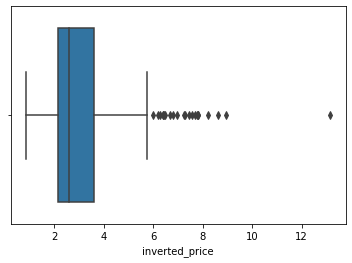

In [30]:
sns.boxplot(df['inverted_price'])

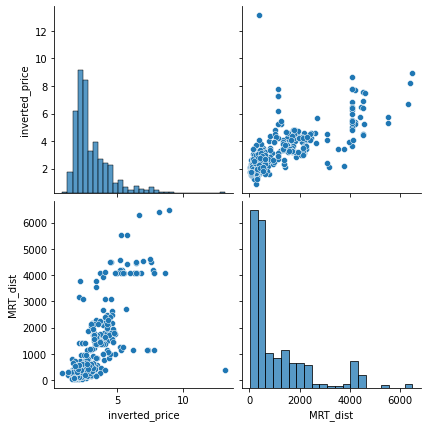

In [32]:
sns.pairplot(df[["inverted_price", "MRT_dist"]], height = 3)
plt.show()

one outlier in inverted_price column.

In [33]:
#Removing outlier

outl = df.inverted_price.max()
df = df[df.inverted_price < outl].copy()

### Regression Model

In [35]:
model = smf.ols("inverted_price ~ MRT_dist + stores + age + year + latitude + longitude",data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         inverted_price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     195.8
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.71e-116
Time:                        00:46:36   Log-Likelihood:                -431.50
No. Observations:                 413   AIC:                             877.0
Df Residuals:                     406   BIC:                             905.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1642.5058    496.579      3.308      0.001     666.319    2618.692
MRT_dist       0.0006   5.61e-05     10.021      0.000       0.000       0.001
stores        -0.0723      0.015     -4.908      0.000      -0.101      -0.043
age            0.0213      0.003      7.043      0.000       0.015       0.027
year          -0.2731      0.074     -3.674      0.000      -0.419      -0.127
latitude     -28.8408      3.486     -8.273      0.000     -35.694     -21.988
longitude     -3.0465      3.809     -0.800      0.424     -10.535       4.442
==============================================================================
Omnibus:                       71.125   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              544.490
Skew:                           0.457   Prob(JB):                    5.83e-119
Kurtosis:                       8.550   Cond. No.                     3.47e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

longitude variable is insignificant since the p value is more than 0.05

In [39]:
df["MRT_dist"] = df["MRT_dist"] / 1000
# MRT_dist in kilometers.

df["year"] = df["year"] - df["year"].min()
# Base Year 2012 is now Year 0.

df["latitude"] = (df["latitude"] - df["latitude"].min()) * 100
df["longitude"] = (df["longitude"] - df["longitude"].min()) * 100
# longitude and latitude now show the distance to a base coordinate.

df.describe()

,age,MRT_dist,stores,latitude,longitude,price,year,inverted_price
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,17.719613,1.085558,4.089588,3.697777,5.981956,38.053753,0.694915,3.048990
std,11.405397,1.263181,2.947636,1.242002,1.536400,13.540320,0.461002,1.358918
min,0.000000,0.023383,0.000000,0.000000,0.000000,11.200000,0.000000,0.851064
25%,9.000000,0.289325,1.000000,3.096000,5.407000,27.700000,0.000000,2.145923
50%,16.100000,0.492231,4.000000,3.903000,6.510000,38.500000,1.000000,2.597403
75%,28.200000,1.455798,6.000000,4.539000,6.978000,46.600000,1.000000,3.610108
max,43.800000,6.488021,10.000000,8.252000,9.274000,117.500000,1.000000,8.928571


In [40]:
model1 = smf.ols("inverted_price ~ MRT_dist + stores + age + year + latitude",data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         inverted_price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     235.0
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.46e-117
Time:                        01:01:37   Log-Likelihood:                -431.83
No. Observations:                 413   AIC:                             875.7
Df Residuals:                     407   BIC:                             899.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5631      0.176     20.223      0.000       3.217       3.909
MRT_dist       0.5949      0.038     15.575      0.000       0.520       0.670
stores        -0.0716      0.015     -4.872      0.000      -0.100      -0.043
age            0.0214      0.003      7.078      0.000       0.015       0.027
year          -0.2762      0.074     -3.721      0.000      -0.422      -0.130
latitude      -0.2850      0.035     -8.241      0.000      -0.353      -0.217
==============================================================================
Omnibus:                       73.048   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              560.981
Skew:                           0.480   Prob(JB):                    1.53e-122
Kurtosis:                       8.628   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared value is greater than 70%. 
condition number less than 1000, no sign of multicollinearity.

In [41]:
model1.params <0

Intercept    False
MRT_dist     False
stores        True
age          False
year          True
latitude      True
dtype: bool

The regression coefficients are based on inverse prices (area per unit of money)!
A positive regression coefficient means: the higher (lower) the factor, the lower (higher) the price.


Final summary:

The distance to the next MRT station significantly influences house prices. A lower distance leads to a higher price (most likely).

The number of convenience stores in the living circle on foot significantly influences house prices. A higher number leads to a higher price (most likely).

The house age significantly influences house prices. A lower age leads to a higher price (most likely).

The transaction year significantly influences house prices. Prices increased from 2012 to 2013. This is in line with rising house prices over time. 

The latitude significantly influences house prices. The more to the northern part of the city, the higher the price. This means, the closer to the seaside/coast, the higher the price (most likely).

The longitude does not significantly influence house prices.